# Regresión lineal: Marine climate

### Imports y config básica

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Para reproducibilidad
np.random.seed(42)

# Opcional: hacer las letras algo más grandes
plt.rcParams["font.size"] = 12

import warnings
warnings.filterwarnings("ignore")


### PARTE 1: CARGA y EXPLORACION DEL DATASET

In [ ]:
data = pd.read_csv("data/MarineClimate.csv")
data.head()
data.describe()

,WindSpeed,WindDirection,Period,Pressure,WaveHeight,ExtremeWaves
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,22.332161,183.899341,9.124156,1010.779916,3.307572,0.646667
std,10.301919,108.932530,3.684557,11.872048,1.438077,0.478804
min,5.177155,3.901555,3.060216,990.255435,0.559017,0.000000
25%,13.367828,89.861372,5.726965,1000.361580,2.166757,0.000000
50%,22.910121,187.812998,8.887234,1011.855166,3.228535,1.000000
75%,31.490087,278.403132,12.320848,1021.497582,4.569987,1.000000
max,39.651885,359.898362,15.959365,1029.917364,6.198306,1.000000


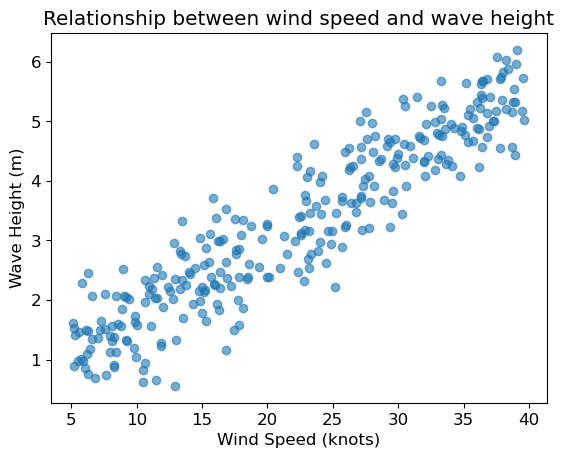

In [15]:
plt.scatter(data["WindSpeed"], data["WaveHeight"], alpha=0.6)
plt.xlabel("Wind Speed (knots)")
plt.ylabel("Wave Height (m)")
plt.title("Relationship between wind speed and wave height")
plt.show()

### PARTE 2: Dividir en train / test y preparar X, Y

Vamos a usar solo Wind Speed como variable predictora

In [16]:
X = data[["WindSpeed"]]
y = data["WaveHeight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

len(X_train), len(X_test)

(210, 90)

### PARTE 3: Ajustar regresión lineal y mostrar la recta

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
print("MSE test:", mse_lin)

MSE test: 0.34507055990583824


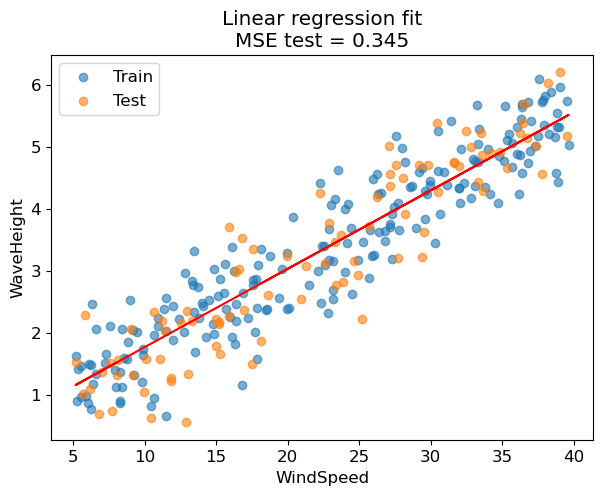

In [18]:
# Gráfico
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(X_train, y_train, alpha=0.6, label="Train")
ax.scatter(X_test, y_test, alpha=0.6, label="Test")

ax.plot(X, lin_reg.predict(X), color="red")

ax.set_xlabel("WindSpeed")
ax.set_ylabel("WaveHeight")
ax.set_title("Linear regression fit\n"
             f"MSE test = {mse_lin:.3f}")
ax.legend()
plt.show()

### PARTE 4: Predice altura de ola si tenemos un viento de 20 nudos (1 nudo a 0,514 m/s)

In [ ]:
# Crear un array 2D con el valor 20
wind = np.array([[20]])

# Predecir la altura de la ola
predicted_wave = lin_reg.predict(wind)
print(f"Predicted Wave Height for Wind Speed of 20 knots: {predicted_wave:.2f} m")

Predicted Wave Height for Wind Speed of 20 knots: 3.03 m
